# Graph Coloring Problem

## Problem Statement

The graph coloring task is used to assign a color for every node in the graph in such a way
that no pair of connected (adjacent) nodes will share the same color. This is also known as
the proper coloring of the graph

```{figure} ./../img/2024-04-26-12-45-42.png
---
align: center
---

Graph Coloring Solution Exammple.
https://en.wikipedia.org/wiki/File:Petersen_graph_3-coloring.svg

```

Should have the following:

self.nodeList = list(self.graph.nodes)
self.adjMatrix = nx.adjacency_matrix(graph).todense()

calculate the number of coloring violations in the given color arrangement.

`getViolationsCount(colorArrangement)` calculate the number of coloring violations in the given color arrangement.
`getNumberOfColors(colorArrangement)` calculate the number of colors used by the given color
arrangement.
`getCost(colorArrangement)`: Calculates the `total cost` of the given color arrangement
`plotGraph(colorArrangement)`: Plots the graph with the nodes colored according to the given color arrangement

The following should be implemented:

```python
# create a problem instance with petersen graph:
gcp = GraphColoringProblem(nx.petersen_graph(), 10)

# generate a random solution with up to 5 different colors:
solution = np.random.randint(5, size=len(gcp))

print("solution = ", solution)
print("number of colors = ", gcp.getNumberOfColors(solution))
print("Number of violations = ", gcp.getViolationsCount(solution))
print("Cost = ", gcp.getCost(solution))

plot = gcp.plotGraph(solution)
plot.show()
```

And print something like this:

![](./../img/2024-04-26-14-06-00.png)


### Base Code

```python
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

class GraphColoringProblem:
    """This class encapsulates the Graph Coloring problem
    """

    def __init__(self, graph, hardConstraintPenalty):
        """
        :param graph: a NetworkX graph to be colored
        :param hardConstraintPenalty: penalty for hard constraint (coloring violation)
        """

        # initialize instance variables:
        self.graph = graph
        self.hardConstraintPenalty = hardConstraintPenalty

        # a list of the nodes in the graph:
        self.nodeList = list(self.graph.nodes)

        # adjacency matrix of the nodes -
        # matrix[i,j] equals '1' if nodes i and j are connected, or '0' otherwise:
        self.adjMatrix = nx.adjacency_matrix(graph).todense()

    def __len__(self):
        """
        :return: the number of nodes in the graph
        """
        return nx.number_of_nodes(self.graph)

    def getCost(self, colorArrangement) -> int:
        """
        Calculates the cost of the suggested color arrangement
        :param colorArrangement: a list of integers representing the suggested color arrangement for the nodes,
        one color per node in the graph
        :return: Calculated cost of the arrangement.
        """
        # TODO HardConstraintPenalty * getViolationsCount + getNumberOfColors (soft constraint)


        pass

    def getViolationsCount(self, colorArrangement) -> int:
        """
        Calculates the number of violations in the given color arrangement. Each pair of interconnected nodes
        with the same color counts as one violation.
        :param colorArrangement: a list of integers representing the suggested color arrangement for the nodes,
        one color per node in the graph
        :return: the calculated value
        """

        if len(colorArrangement) != self.__len__():
            raise ValueError("size of color arrangement should be equal to ", self.__len__())

        violations = 0

        # TODO iterate over every pair of nodes and find if they are adjacent AND share the same color: then increment violations


        return violations

    def getNumberOfColors(self, colorArrangement) -> int:
        """
        returns the number of different colors in the suggested color arrangement
        :param colorArrangement: a list of integers representing the suggested color arrangement fpo the nodes,
        one color per node in the graph
        :return: number of different colors
        """
        return len(set(colorArrangement))


    def plotGraph(self, colorArrangement) -> plt:
        """
        Plots the graph with the nodes colored according to the given color arrangement
        :param colorArrangement: a list of integers representing the suggested color arrangement fpo the nodes,
        one color per node in the graph
        """

        if len(colorArrangement) != self.__len__():
            raise ValueError("size of color list should be equal to ", self.__len__())

        # create a list of the unique colors in the arrangement:
        colorList = list(set(colorArrangement))

        # create the actual colors for the integers in the color list:
        colors = plt.cm.rainbow(np.linspace(0, 1, len(colorList)))

        # TODO iterate over the nodes, and give each one of them its corresponding color:
        colorMap = []
        for i in range(self.__len__()):
            color = colors[colorList.index(colorArrangement[i])]
            colorMap.append(color)

        # plot the nodes with their labels and matching colors:
        nx.draw_kamada_kawai(self.graph, node_color=colorMap, with_labels=True)
        #nx.draw_circular(self.graph, node_color=color_map, with_labels=True)

        return plt


```

Draw Kamada Kawai
https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.kamada_kawai_layout.html#networkx.drawing.layout.kamada_kawai_layout

Parameters:

**G: NetworkX graph or list of nodes**
A position will be assigned to every node in G.

**dist: dict (default=None)**
A two-level dictionary of optimal distances between nodes, indexed by source and destination node. If None, the distance is computed using shortest_path_length().

**pos: dict or None optional (default=None)**
Initial positions for nodes as a dictionary with node as keys and values as a coordinate list or tuple. If None, then use circular_layout() for dim >= 2 and a linear layout for dim == 1.

**weight: string or None optional (default=’weight’)**
The edge attribute that holds the numerical value used for the edge weight. If None, then all edge weights are 1.

**scale: number (default: 1)**
Scale factor for positions.

**center: array-like or None**
Coordinate pair around which to center the layout.

**dim: int**
Dimension of layout.

## Solution

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

class GraphColoringProblem:
    """This class encapsulates the Graph Coloring problem
    """

    def __init__(self, graph, hardConstraintPenalty):
        """
        :param graph: a NetworkX graph to be colored
        :param hardConstraintPenalty: penalty for hard constraint (coloring violation)
        """

        # initialize instance variables:
        self.graph = graph
        self.hardConstraintPenalty = hardConstraintPenalty

        # a list of the nodes in the graph:
        self.nodeList = list(self.graph.nodes)

        # adjacency matrix of the nodes -
        # matrix[i,j] equals '1' if nodes i and j are connected, or '0' otherwise:
        self.adjMatrix = nx.adjacency_matrix(graph).todense()

    def __len__(self):
        """
        :return: the number of nodes in the graph
        """
        return nx.number_of_nodes(self.graph)

    def getCost(self, colorArrangement):
        """
        Calculates the cost of the suggested color arrangement
        :param colorArrangement: a list of integers representing the suggested color arrangement for the nodes,
        one color per node in the graph
        :return: Calculated cost of the arrangement.
        """

        return self.hardConstraintPenalty * self.getViolationsCount(colorArrangement) + self.getNumberOfColors(colorArrangement)

    def getViolationsCount(self, colorArrangement):
        """
        Calculates the number of violations in the given color arrangement. Each pair of interconnected nodes
        with the same color counts as one violation.
        :param colorArrangement: a list of integers representing the suggested color arrangement for the nodes,
        one color per node in the graph
        :return: the calculated value
        """

        if len(colorArrangement) != self.__len__():
            raise ValueError("size of color arrangement should be equal to ", self.__len__())

        violations = 0

        # iterate over every pair of nodes and find if they are adjacent AND share the same color:
        for i in range(len(colorArrangement)):
            for j in range(i + 1, len(colorArrangement)):

                if self.adjMatrix[i, j]:    # these are adjacent nodes
                    if colorArrangement[i] == colorArrangement[j]:
                        violations += 1

        return violations

    def getNumberOfColors(self, colorArrangement):
        """
        returns the number of different colors in the suggested color arrangement
        :param colorArrangement: a list of integers representing the suggested color arrangement fpo the nodes,
        one color per node in the graph
        :return: number of different colors
        """
        return len(set(colorArrangement))

    def plotGraph(self, colorArrangement):
        """
        Plots the graph with the nodes colored according to the given color arrangement
        :param colorArrangement: a list of integers representing the suggested color arrangement fpo the nodes,
        one color per node in the graph
        """

        if len(colorArrangement) != self.__len__():
            raise ValueError("size of color list should be equal to ", self.__len__())

        # create a list of the unique colors in the arrangement:
        colorList = list(set(colorArrangement))

        # create the actual colors for the integers in the color list:
        colors = plt.cm.rainbow(np.linspace(0, 1, len(colorList)))

        # iterate over the nodes, and give each one of them its corresponding color:
        colorMap = []
        for i in range(self.__len__()):
            color = colors[colorList.index(colorArrangement[i])]
            colorMap.append(color)

        # plot the nodes with their labels and matching colors:
        nx.draw_kamada_kawai(self.graph, node_color=colorMap, with_labels=True)
        #nx.draw_circular(self.graph, node_color=color_map, with_labels=True)

        return plt

solution =  [1 1 3 1 4 4 0 0 3 3]
number of colors =  4
Number of violations =  1
Cost =  14


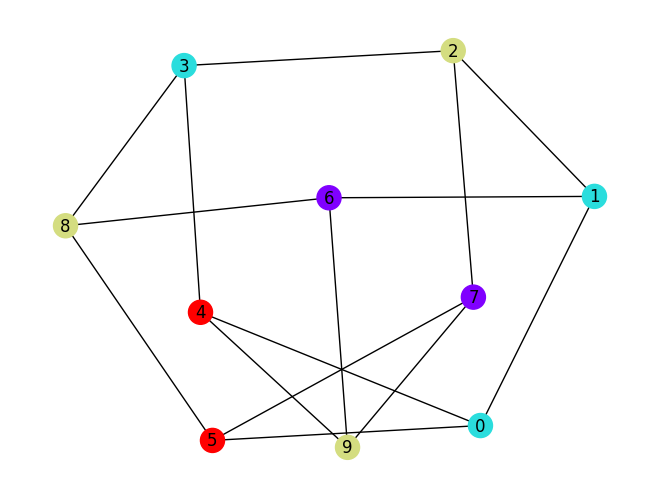

In [4]:
# create a problem instance with petersen graph:
gcp = GraphColoringProblem(nx.petersen_graph(), 10)

# generate a random solution with up to 5 different colors:
solution = np.random.randint(5, size=len(gcp))

print("solution = ", solution)
print("number of colors = ", gcp.getNumberOfColors(solution))
print("Number of violations = ", gcp.getViolationsCount(solution))
print("Cost = ", gcp.getCost(solution))

plot = gcp.plotGraph(solution)
plot.show()


In [5]:
from deap import base
from deap import creator
from deap import tools

import random
import numpy

import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

import elitism
import graphs



# problem constants:
HARD_CONSTRAINT_PENALTY = 10  # the penalty factor for a hard-constraint violation

# Genetic Algorithm constants:
POPULATION_SIZE = 100
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual
MAX_GENERATIONS = 100
HALL_OF_FAME_SIZE = 5
MAX_COLORS = 10

# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

toolbox = base.Toolbox()

# TODO create the graph coloring problem instance to be used:

gcp = graphs.GraphColoringProblem(nx.petersen_graph(), HARD_CONSTRAINT_PENALTY)
#gcp = graphs.GraphColoringProblem(nx.mycielski_graph(5), HARD_CONSTRAINT_PENALTY)

# define a single objective, maximizing fitness strategy:

# create the Individual class based on list:

# create an operator that randomly returns an integer in the range of participating colors:


# create the individual operator to fill up an Individual instance:

# create the population operator to generate a list of individuals:


# fitness calculation: cost of the suggested olution
def getCost(individual):
    return gcp.getCost(individual),  # return a tuple


toolbox.register("evaluate", getCost)

# TODO Register the following genetic operators:
"""
- Select using Tournament
- Crossover using Two-Point
- Mutation using Uniform Int
"""


# Genetic Algorithm flow:
def main():

    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", numpy.min)
    stats.register("avg", numpy.mean)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with elitism:
    population, logbook = elitism.eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    # print info for best solution found:
    best = hof.items[0]
    print("-- Best Individual = ", best)
    print("-- Best Fitness = ", best.fitness.values[0])
    print()
    print("number of colors = ", gcp.getNumberOfColors(best))
    print("Number of violations = ", gcp.getViolationsCount(best))
    print("Cost = ", gcp.getCost(best))

    # plot best solution:
    plt.figure(1)
    gcp.plotGraph(best)

    # extract statistics:
    minFitnessValues, meanFitnessValues = logbook.select("min", "avg")

    # plot statistics:
    plt.figure(2)
    sns.set_style("whitegrid")
    plt.plot(minFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Min / Average Fitness')
    plt.title('Min and Average fitness over Generations')

    plt.show()




ModuleNotFoundError: No module named 'graphs'

### Solution

In [ ]:
from deap import base
from deap import creator
from deap import tools

import random
import numpy

import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

import elitism
import graphs



# problem constants:
HARD_CONSTRAINT_PENALTY = 10  # the penalty factor for a hard-constraint violation

# Genetic Algorithm constants:
POPULATION_SIZE = 100
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual
MAX_GENERATIONS = 100
HALL_OF_FAME_SIZE = 5
MAX_COLORS = 10

# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

toolbox = base.Toolbox()

# create the graph coloring problem instance to be used:
gcp = graphs.GraphColoringProblem(nx.petersen_graph(), HARD_CONSTRAINT_PENALTY)
#gcp = graphs.GraphColoringProblem(nx.mycielski_graph(5), HARD_CONSTRAINT_PENALTY)

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMin)

# create an operator that randomly returns an integer in the range of participating colors:
toolbox.register("Integers", random.randint, 0, MAX_COLORS - 1)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.Integers, len(gcp))

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation: cost of the suggested olution
def getCost(individual):
    return gcp.getCost(individual),  # return a tuple


toolbox.register("evaluate", getCost)

# genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=MAX_COLORS - 1, indpb=1.0/len(gcp))

# =========================================================================================================

# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)

# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", numpy.min)
stats.register("avg", numpy.mean)

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# perform the Genetic Algorithm flow with elitism:
population, logbook = elitism.eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                            ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

# print info for best solution found:
best = hof.items[0]
print("-- Best Individual = ", best)
print("-- Best Fitness = ", best.fitness.values[0])
print()
print("number of colors = ", gcp.getNumberOfColors(best))
print("Number of violations = ", gcp.getViolationsCount(best))
print("Cost = ", gcp.getCost(best))

# plot best solution:
plt.figure(1)
gcp.plotGraph(best)

# extract statistics:
minFitnessValues, meanFitnessValues = logbook.select("min", "avg")

# plot statistics:
plt.figure(2)
sns.set_style("whitegrid")
plt.plot(minFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Min / Average Fitness')
plt.title('Min and Average fitness over Generations')

plt.show()
